In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import sem

%matplotlib inline
%config Completer.use_jedi = False


#import required sklearn for logistic regression classifier

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold, cross_validate
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold, SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the filtered cis eQTL 95 file and the file containing all genes for BRCA
#Only matched samples / files used

cis_eQTL_95_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/eQTL/eQTL_95/BRCA_FPKM_cis_eQTL_95_matched.csv'
all_genes_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/GeneExpression_MAF/BRCA_FPKM_protein_all_matched.csv'

cis_eQTL_95 = pd.read_csv(cis_eQTL_95_file,header=[0,1],sep='\t',index_col=[0])
all_genes = pd.read_csv(all_genes_file,header=[0,1],sep='\t',index_col=[0])


In [3]:
cis_eQTL_95

Gene_symbol,ZNF117,BTN3A2,TYW1,C2orf74,ZNF781,ZSCAN23,NUDT2,GYPE,WFDC3,MANBA,...,RNASET2,PAX8,SLC5A11,MAATS1,NDUFA10,SNX16,PNPT1,TMEM115,UPK3B,Cancer
Gene_ensembl_id,ENSG00000152926,ENSG00000186470,ENSG00000198874,ENSG00000237651,ENSG00000196381,ENSG00000187987,ENSG00000164978,ENSG00000197465,ENSG00000124116,ENSG00000109323,...,ENSG00000026297,ENSG00000125618,ENSG00000158865,ENSG00000183833,ENSG00000130414,ENSG00000104497,ENSG00000138035,ENSG00000126062,ENSG00000243566,Cancer
TCGA-BH-A1FN,7.120216,4.985915,7.126943,0.460833,0.479443,0.233240,8.484795,0.089906,0.636779,8.392460,...,6.479719,0.143041,0.428664,1.324786,6.583425,2.960510,10.835174,11.768108,0.084667,1
TCGA-E9-A1NG,1.433767,8.839503,5.993562,1.198498,0.560200,0.112217,10.685053,0.190402,0.519732,8.067247,...,6.713850,0.652537,0.015411,0.631393,8.841204,2.485926,5.548466,22.074770,0.103874,1
TCGA-AC-A23H,1.527223,1.443108,5.757805,0.447189,0.074923,0.053655,16.385836,0.094659,0.191557,11.752712,...,5.295477,0.554810,0.210290,0.404245,12.745408,2.310231,7.199830,19.680244,0.081503,1
TCGA-A7-A0DC,3.617470,3.622190,9.517127,1.490931,0.594022,0.855826,17.065616,1.072144,1.649315,6.836674,...,7.215334,6.782236,1.742285,4.636200,13.314166,2.198888,7.050107,8.400419,0.497068,1
TCGA-BH-A0BA,5.287703,8.654868,9.662392,1.885023,0.235394,0.464655,19.354985,0.079661,0.177011,9.000372,...,14.681439,0.148615,0.373977,0.312024,9.322812,5.332927,5.223953,22.574098,0.100026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E9-A1N5,3.111718,9.757594,7.033362,2.330930,0.538346,0.965069,21.306349,0.131750,0.205842,5.452966,...,4.439022,0.338953,0.009664,0.534110,11.051978,2.763404,6.698382,18.477069,0.086851,0
TCGA-BH-A1FG,3.279355,5.861261,4.467821,1.154882,1.147128,0.065983,8.711419,0.457326,0.069286,3.290395,...,2.119159,0.463870,0.004879,1.421047,5.812983,4.503790,5.725373,11.437532,0.062644,0
TCGA-BH-A1EO,3.067988,10.596617,4.420259,2.639467,1.270040,0.056445,24.360201,0.798162,0.348761,5.282910,...,4.280005,1.005629,0.051408,0.155095,6.794516,5.752456,4.331358,20.611693,0.219996,0


In [4]:
#Check for and missing data

cis_eQTL_95.isnull().sum().unique()

array([0])

In [5]:
#Check all genes file for missing data

all_genes.isnull().sum().sort_values(ascending = False)

#AFT7-NPFF is 'an important paralog of the gene AFT7' => could combine data for both??

Gene_symbol  Gene_ensembl_id
ATF7         ENSG00000267281    117
ATF7-NPFF    ENSG00000267281    112
A1BG         ENSG00000121410      0
PPP1R9A      ENSG00000158528      0
PPP2R1B      ENSG00000137713      0
                               ... 
GBP5         ENSG00000154451      0
GBP4         ENSG00000162654      0
GBP3         ENSG00000117226      0
GBP2         ENSG00000162645      0
ZZEF1        ENSG00000074755      0
Length: 19538, dtype: int64

In [6]:
#For now, will drop the missing data

all_genes.dropna(axis=1,inplace=True)

In [7]:
all_genes.isnull().sum().unique()

array([0])

In [8]:
#Check tumour weight / ratio ... since almost equal will not use 'class_weight' in model

tumour_ratio = sum(cis_eQTL_95['Cancer','Cancer']==1) / sum(cis_eQTL_95['Cancer','Cancer']==0)
tumour_ratio

1.0446428571428572

In [9]:
#Do an initial train test split to extract an 'unseen' test set of data (30%) for both cis eQTL and all genes
#Set stratify as y to keep same ratio in test data

X_full_cis = cis_eQTL_95.drop('Cancer',axis=1,level=0)
y_full_cis = cis_eQTL_95['Cancer','Cancer']

X_develop_cis, X_test_cis, y_develop_cis, y_test_cis = train_test_split(X_full_cis, y_full_cis, test_size=0.3, random_state=10,stratify=y_full_cis)


In [10]:
#Repeat for all genes .. using random sample of same number of genes as cis

X_full_all = all_genes.drop('Cancer',axis=1,level=0)
y_full_all = all_genes['Cancer','Cancer']

#Take a random sample of genes 5 seperate times .. use X_full_iso.columns to acquire same num of genes as isoform
X_random_1 = X_full_all.sample(n=len(X_full_cis.columns),axis=1)
X_random_2 = X_full_all.sample(n=len(X_full_cis.columns),axis=1)
X_random_3 = X_full_all.sample(n=len(X_full_cis.columns),axis=1)

#Change random state for each 
X_develop_ran_1, X_test_ran_1, y_develop_ran_1, y_test_ran_1 = train_test_split(X_random_1, y_full_all, test_size=0.3, random_state=1,stratify=y_full_all)
X_develop_ran_2, X_test_ran_2, y_develop_ran_2, y_test_ran_2 = train_test_split(X_random_2, y_full_all, test_size=0.3, random_state=2,stratify=y_full_all)
X_develop_ran_3, X_test_ran_3, y_develop_ran_3, y_test_ran_3 = train_test_split(X_random_3, y_full_all, test_size=0.3, random_state=3,stratify=y_full_all)


In [11]:
#First do simple Logistic Regression with gridsearch to determine optimal parameters

def grid_search_LR(X,y):
    '''Perform logistic regression grid search. Supply development X and y data.'''

    #Logistic Regression with dual = False since n_samples > n_features
    classifier = LogisticRegression(dual=False)
    
    #Want to add PCA to pipeline
    pca = PCA(n_components=10)

    #Pipeline containing Log Reg classifier and Log Reg with deafault settings for feature engineering
    #Also added scaler as error related to iterations / convergance appears, which can be due to 'poor scaling'
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',pca),
                                  ('feature_selection', SelectFromModel(LogisticRegression(dual=False))),
                                  ('classifier',classifier)])


    #Two dictionaries of potential potential parameters to account for penalties and solvers that can/can't go togther
    #The PCA searches from 1 upto max number of features / genes in 5 steps (since can't search PC's more than max num of features)
    param_grid = [
        {'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga'],
         'classifier__C':[0.01,0.1,1,10,100]},
        {'classifier__penalty': ['l2'], 'classifier__solver': ['liblinear', 'sag', 'saga','newton-cg'],
         'classifier__C':[0.01,0.1,1,10,100]}
    ]


    #Use repeated stratified k fold to maintian ratio between tumor and normal and do multliple splits of data
    r_stratkfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

    grid_search = GridSearchCV(LR_pipeline, param_grid=param_grid, scoring="roc_auc",cv=r_stratkfold)

    #Fit on development data
    grid_search.fit(X, y)
    
    #Create dictinoary to store the best parameters
    best_params = {}
    
    for k,v in grid_search.best_params_.items():
        
        best_params[k] = v
 
    #Return the best_params dictinoary => run this fuction and save as new variable in relation to what X and y run
    return best_params

In [12]:
#Run the gridsearch for both the cisform and all genes development data to create dictionaries to plug into CV

best_params_cis = grid_search_LR(X_develop_cis,y_develop_cis)
best_params_cis

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

{'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [13]:
best_params_ran_1 = grid_search_LR(X_develop_ran_1,y_develop_ran_1)
best_params_ran_2 = grid_search_LR(X_develop_ran_2,y_develop_ran_2)
best_params_ran_3 = grid_search_LR(X_develop_ran_3,y_develop_ran_3)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [14]:
#Now define model functions that will return cross_validate to evalaute model overall

In [15]:
# Create a function that cross validates the data

def LR_model_cv(X, y, best_params_dict, repeats = 3, splits = 3):
    '''LR model function. Takes in X and y development data, repeats, splits and the required best_params dictinoary'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_cis from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier)),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    #Define performance metrics to return 
    F1 = str(f"Mean F1 weighted = {scores_cv['test_f1_weighted'].mean():.3f} SEM = {sem(scores_cv['test_f1_weighted']):.3f}")
    ROCAUC = str(f"Mean ROCAUC score = {scores_cv['test_roc_auc'].mean():.3f} SEM = {sem(scores_cv['test_roc_auc']):.3f} ")
    Accuracy = str(f"Mean balanced accuracy score = {scores_cv['test_balanced_accuracy'].mean():.3f} SEM = {sem(scores_cv['test_balanced_accuracy']):.3f} ")
    Precision = str(f"Mean weighted precision = {scores_cv['test_precision_weighted'].mean():.3f} SEM = {sem(scores_cv['test_precision_weighted']):.3f} ")
    Recall = str(f"Mean weighted recall = {scores_cv['test_recall_weighted'].mean():.3f} SEM = {sem(scores_cv['test_recall_weighted']):.3f} ")
    
    return F1, ROCAUC, Accuracy, Precision, Recall

In [16]:
#Compare the two cross validations with 3 repeats and 3 splits

LR_model_cv(X_develop_cis,y_develop_cis,best_params_cis)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

('Mean F1 weighted = 0.979 SEM = 0.005',
 'Mean ROCAUC score = 0.983 SEM = 0.006 ',
 'Mean balanced accuracy score = 0.979 SEM = 0.005 ',
 'Mean weighted precision = 0.980 SEM = 0.005 ',
 'Mean weighted recall = 0.979 SEM = 0.005 ')

In [17]:
LR_model_cv(X_develop_ran_1,y_develop_ran_1,best_params_ran_1)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

('Mean F1 weighted = 0.956 SEM = 0.009',
 'Mean ROCAUC score = 0.985 SEM = 0.007 ',
 'Mean balanced accuracy score = 0.957 SEM = 0.009 ',
 'Mean weighted precision = 0.958 SEM = 0.008 ',
 'Mean weighted recall = 0.956 SEM = 0.009 ')

In [18]:
#Now create models utilising the above parameters to perform a test on the unseeen test data

In [19]:
# Create function to perform test

def LR_model_test(X_develop,y_develop,X_test,y_test, best_params_dict):
    '''Function fits the predetermined LR_pipeline for the data before predicting on the unseen test data'''
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier)),
                                   ('classifier',classifier)])
    
    #Fit on the develop data
    LR_pipeline.fit(X_develop,y_develop)
    
    #Then make predictions on the unseen test data from the initial train test split
    predictions = LR_pipeline.predict(X_test)
    
    #Return classification report and ROCAUC score
    print (classification_report(predictions,y_test,target_names=['Normal - 0','Cancer - 1']))
    
    ROCAUC =  round(roc_auc_score(predictions,y_test),2)
    
    return ROCAUC

In [20]:
#Now run on both set of data to compare the results

In [21]:
LR_model_test(X_develop_cis,y_develop_cis,X_test_cis,y_test_cis,best_params_cis)

              precision    recall  f1-score   support

  Normal - 0       0.97      0.97      0.97        34
  Cancer - 1       0.97      0.97      0.97        35

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.97

In [22]:
ran_test_1 = LR_model_test(X_develop_ran_1,y_develop_ran_1,X_test_ran_1,y_test_ran_1,best_params_ran_1)
ran_test_2 = LR_model_test(X_develop_ran_2,y_develop_ran_2,X_test_ran_2,y_test_ran_2,best_params_ran_2)
ran_test_3 = LR_model_test(X_develop_ran_3,y_develop_ran_3,X_test_ran_3,y_test_ran_3,best_params_ran_3)

              precision    recall  f1-score   support

  Normal - 0       0.97      1.00      0.99        33
  Cancer - 1       1.00      0.97      0.99        36

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69

              precision    recall  f1-score   support

  Normal - 0       0.97      1.00      0.99        33
  Cancer - 1       1.00      0.97      0.99        36

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69

              precision    recall  f1-score   support

  Normal - 0       1.00      1.00      1.00        34
  Cancer - 1       1.00      1.00      1.00        35

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [23]:
#Calculate mean and standard error of mean for the three random gene data sets

mean_random_ROCAUC =round(np.mean([ran_test_1,ran_test_2,ran_test_3]),2)
STD_random_ROCAUC =round(np.std([ran_test_1,ran_test_2,ran_test_3]),2)

print(f'Mean random ROCAUC sore = {mean_random_ROCAUC} ± {STD_random_ROCAUC}')

Mean random ROCAUC sore = 0.99 ± 0.0


In [23]:
#Def function to extract the features selected during pipeline SelectFromModel as a list 

def LR_model_features(X, y, best_params_dict, repeats = 3, splits = 3, max_features = None):
    '''LR model function. Takes in X and y development data, repeats, splits, the required best_params dictinoary and the max_features to return from SelectFromModel'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_cis from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier,max_features=max_features)),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    
    #To get the features selected via SelectFromModel need to fit the pipeline and extract the named_steps['feature_selection']
    selected_features = LR_pipeline.named_steps['feature_selection'].fit(X,y)
    
    #Can then plug selected_features.get_support into X.columns (which is full set of features)
    features = X.columns[selected_features.get_support()]
    
    #Create series for plot off feature importance - coefficient value for each feature = coef_[0]
    feat_importances = pd.Series(selected_features.estimator_.coef_[0],index= X.columns)
    
    #Plot
    plt.figure(figsize=(12,6))
    feat_importances.nlargest(10).plot(kind='barh')
    plt.xlabel('Feature Importance')
    
    return list(features)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

[('PLPP1', 'ENSG00000067113'),
 ('RPL9', 'ENSG00000163682'),
 ('HMGN1', 'ENSG00000205581'),
 ('LYZ', 'ENSG00000090382'),
 ('SELENOP', 'ENSG00000250722'),
 ('PLAC9', 'ENSG00000189129'),
 ('SERINC2', 'ENSG00000168528'),
 ('CAT', 'ENSG00000121691'),
 ('HSPA4', 'ENSG00000170606'),
 ('NDUFS2', 'ENSG00000158864')]

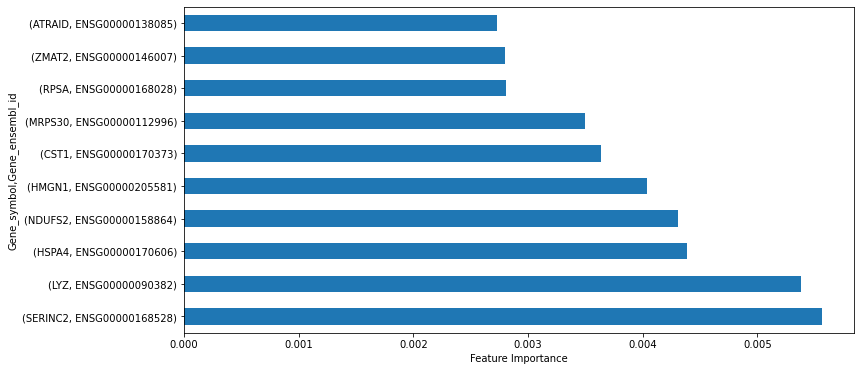

In [24]:
top_10_genes_cis = LR_model_features(X_develop_cis,y_develop_cis,best_params_cis,max_features=10)
top_10_genes_cis